In [19]:
# imports
import string
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

import sys
sys.path.append("..")
import utils

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
# stolen from notebook9
filename = "glove.6B.50d.txt"

embeddings = {}
with open(filename,'r', encoding='utf-8') as file:
    for line in file:
        elements = line.split();
        word = elements[0];
        vector = np.asarray(elements[1:],"float32")
        embeddings[word] = vector

In [3]:
# functions
def preprocess(text, punctuation=False):
    """
    Parameters:
    text (string): raw text from data

    Returns:
    string: string with no punctuation and
            only contains words in embeddings
    """
    if punctuation:
        text_ = ""
        for char in text:
            if char not in string.punctuation:
                text_ += char
        text = text_
    
    text_ = ""
    for word in text.split():
        if word in embeddings:
             text_ += word.lower() + " "
    return text_

def mean_emb(text):
    """
    Parameters:
    text (string): raw text from data
    
    Returns:
    numpy.ndarray(50,): mean embedding of text
    """
    pre = preprocess(text).split()
    sum_emb = np.zeros(50,)
    for word in pre:
        sum_emb += embeddings[word]
    mean_emb = sum_emb/50
    
    return mean_emb

def glove_accuracy(X_train, X_test, y_train, y_test):
    train_embeddings = np.array([mean_emb(text) for text in X_train])
    test_embeddings = np.array([mean_emb(text) for text in X_test])

    clf = GaussianNB().fit(train_embeddings, y_train)

    predictions = clf.predict(test_embeddings)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

In [4]:
## Spam data

In [5]:
spam_train, spam_test = utils.load_data('spam')
glove_accuracy(spam_train['texts'], spam_test['texts'], spam_train['labels'], spam_test['labels'])

0.9336322869955157

In [6]:
news_train, news_test = utils.load_data('news')
glove_accuracy(news_train['texts'], news_test['texts'], news_train['labels'], news_test['labels'])

0.84

## PCA

## sms

In [153]:
#week9NB
def plot_pca(word_list, PC_range=[0,2]):
    
    #obtain dictionary of words from word_list
    sub_dictionary = {key:embeddings[key] for key in word_list}
    words = sub_dictionary.keys()
    vectors = np.asarray([sub_dictionary[key] for key in words]).T
    
    #pca on feature vectors for selected words
    mean_vector = np.mean(vectors,axis=1)
    data = vectors - mean_vector[:,None]
    #compute the covariance matrix
    S = np.cov(data)
    #obtain eigenvectors and eigenvalues
    eigenValues, eigenVectors = eigh(S)
    #sort according to size of eigenvalues
    eigenValues = eigenValues[::-1]
    eigenVectors = eigenVectors[:, ::-1]
#     choose all eigenvectors
#     Y = eigenVectors.T@data
#     choose certain eigenvectors [:,0:2] would be the first 2
    Y = eigenVectors[:,PC_range[0]:PC_range[1]].T@data    
    #plot for first two principal components
    for label, x, y in zip(word_list, Y[0,:], Y[1,:]):
        plt.plot(x,y,"*")
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', size='small')
    plt.show()

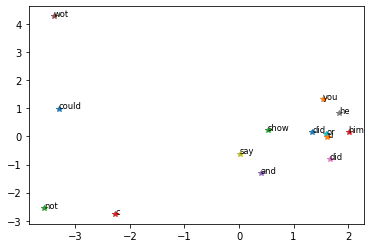

In [154]:
# test on first document
plot_pca(preprocess(spam_train['texts'][0]).split())

In [142]:
# De første 100 dokumenter
plotlist = (preprocess(spam_train['texts'][i]).split() for i in range(100))
l = [item for sublist in plotlist for item in sublist]

Man kunne gøre sådan at hver kategori har sin egen farve, så det er lettere at se ord for de forskellige kategorier

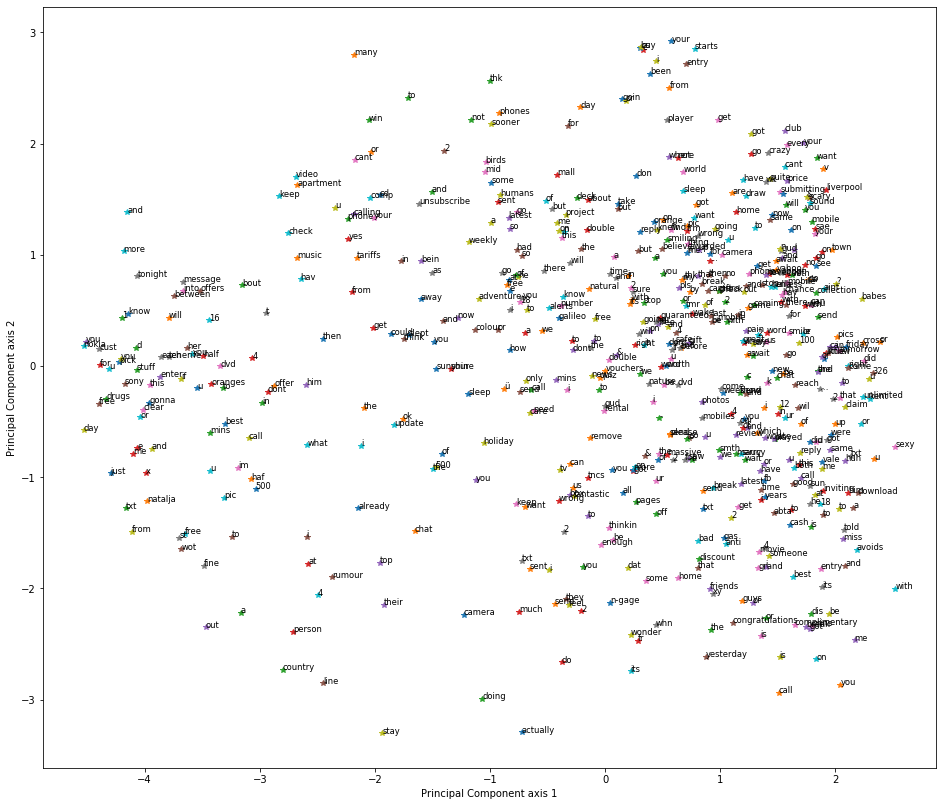

In [141]:
fig = plt.figure(figsize=(16,14))
plt.xlabel('Principal Component axis 1');
plt.ylabel('Principal Component axis 2');
plot_pca(l)

### News

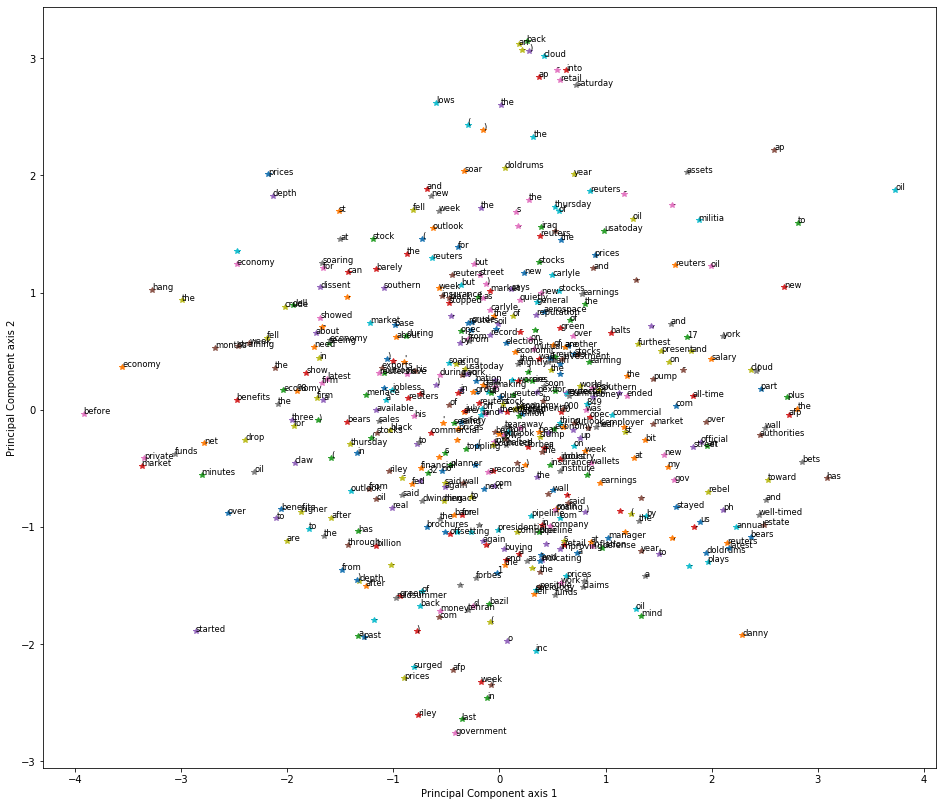

In [157]:
plotlist = (preprocess(news_train['texts'][i]).split() for i in range(30))
l = [item for sublist in plotlist for item in sublist]

fig = plt.figure(figsize=(16,14))
plt.xlabel('Principal Component axis 1');
plt.ylabel('Principal Component axis 2');
plot_pca(l,PC_range=[1,3])